## Waiter tips prjct3

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ps
import plotly.graph_objects as go


In [34]:
#read text
wt=pd.read_csv("waitertip.txt")

In [35]:
#conversion of text file to csv file
wt.to_csv("waitertip.csv")

In [36]:
#display of data
wt.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [37]:
#info()
wt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [38]:
wt.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [39]:
#correlation of data with respect to tip
wt.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


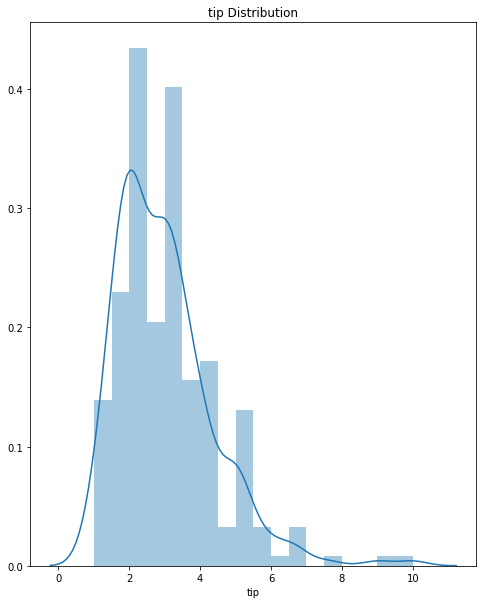

In [40]:
#distribution of tip
plt.figure(figsize=(8,10))
plt.title("tip Distribution")
sns.distplot(wt["tip"])
plt.show()

In [41]:
#scatter distribution
figure=ps.scatter(data_frame=wt, x="total_bill",y="tip",size="size",color="day"
                 ,trendline="ols")
figure.show()

In [42]:
figure=ps.scatter(data_frame=wt, x="total_bill",y="tip",size="size", color="time",trendline="ols")
figure.show()

In [43]:
figure=ps.pie(wt,
             values='tip',
             names="day",
             hole=0.5)
figure.show()

In [44]:
figure=ps.pie(wt,values="tip",names="sex",hole=0.5)
figure.show()

In [45]:
figure=ps.pie(wt,values="tip",names="size",hole=0.5)
figure.show()

    -Since there is a lot of categorical values we need to convert them into numerical values

In [46]:
wt["sex"]= wt["sex"].map({"Female":0,"Male":1})
wt["smoker"]=wt["smoker"].map({"No":0,"Yes":1})
wt["day"]=wt["day"].map({"Sun":1,"Mon":2,"Tue":3,"Wed":4,"Thur":5,"Fri":6,"Sat":7})
wt["time"]=wt["time"].map({"Lunch":0,"Dinner":1})
wt.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,1,1,2
1,10.34,1.66,1,0,1,1,3
2,21.01,3.50,1,0,1,1,3
3,23.68,3.31,1,0,1,1,2
4,24.59,3.61,0,0,1,1,4


In [47]:
x=np.array(wt[["total_bill","sex","smoker","day","time","size"]])
y=np.array(wt["tip"])

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2, random_state=30)


In [48]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
features=np.array([[20,1,1,0,1,1]])
model.predict(features)

array([2.91605583])